<a href="https://colab.research.google.com/github/Pavan042/Covid_19_Image_Classification_CNN_Capstone_Project/blob/main/Covid_19_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Mounting disk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
import keras
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import PIL
import PIL.Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
import math
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
os.chdir('/content/drive/MyDrive/DS_projects/Covid19-dataset')

In [ ]:
test_path = '/content/drive/MyDrive/DS_projects/Covid19-dataset/test'
train_path = '/content/drive/MyDrive/DS_projects/Covid19-dataset/train'

In [ ]:
#img_path = '/content/drive/MyDrive/DS_projects/Covid19-dataset/train'
#img.shape

In [ ]:
labels = []
for i in os.listdir(test_path):
  labels.append(i)
no_labels = len(labels)
print("No of labels: ",no_labels)
print("Labels: ",labels)

No of labels:  3
Labels:  ['Covid', 'Viral Pneumonia', 'Normal']


- Generate batches of tensor image data with real-time data augmentation.

In [ ]:
gen_train = image.ImageDataGenerator(rescale = 1/255,validation_split = 0.2, horizontal_flip = True)
gen_test = image.ImageDataGenerator(rescale = 1/255)
SIZE = (224,224)

- gen_train.flow_from_directory Takes the path to a directory & generates batches of augmented data.

In [ ]:
train_data = gen_train.flow_from_directory(batch_size = 32, directory = train_path, shuffle = True, classes = labels, target_size = SIZE, subset = "training", class_mode = 'binary')
valid_data = gen_train.flow_from_directory(batch_size = 32, directory = train_path, shuffle = True, classes = labels, target_size = SIZE, subset = "validation", class_mode = 'binary')
test_data = gen_test.flow_from_directory(batch_size = 1, directory = test_path, shuffle = False, classes =labels, target_size = SIZE, class_mode = 'binary')

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
train_data.class_indices

{'Covid': 0, 'Viral Pneumonia': 1, 'Normal': 2}

In [ ]:
print('\n\n',{'Viral_Pneumonia_cases':len(np.where(train_data .labels==0)[0]),
      'Covid_cases':len(np.where(train_data.labels==1)[0]),
            'Normal_cases':len(np.where(train_data.labels==2)[0])})



 {'Viral_Pneumonia_cases': 89, 'Covid_cases': 56, 'Normal_cases': 56}


In [ ]:
print('\n\n',{'Viral_Pneumonia_cases':len(np.where(valid_data.labels==0)[0]),
      'Covid_cases':len(np.where(valid_data.labels==1)[0]),
            'Normal_cases':len(np.where(valid_data.labels==2)[0])})



 {'Viral_Pneumonia_cases': 22, 'Covid_cases': 14, 'Normal_cases': 14}


In [ ]:
print('\n\n',{'Viral_Pneumonia_cases':len(np.where(test_data.labels==0)[0]),
      'Covid_cases':len(np.where(test_data.labels==1)[0]),
            'Normal_cases':len(np.where(test_data.labels==2)[0])})



 {'Viral_Pneumonia_cases': 26, 'Covid_cases': 20, 'Normal_cases': 20}


Total Covid Cases:

In [ ]:
20+14+56

90

Total Viral Pneumonia Cases

In [ ]:
26+22+89

137

Total Normal Cases:

In [ ]:
20+14+56

90

## Image Demonstration

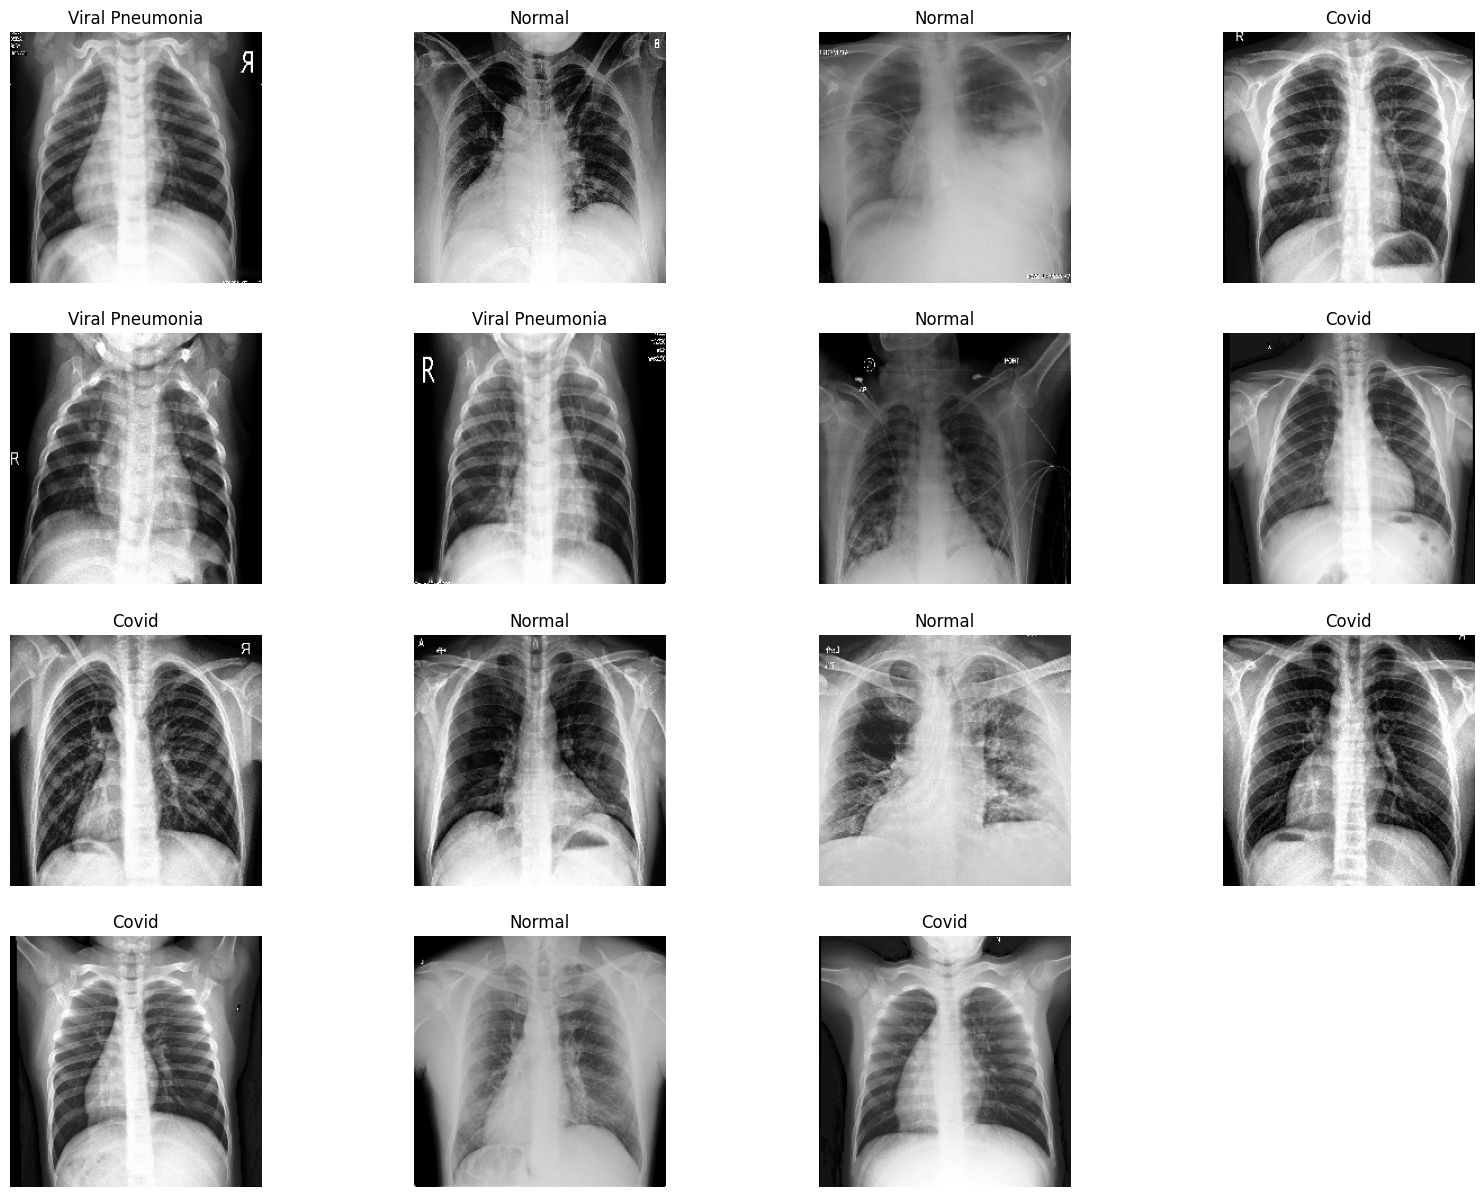

In [ ]:
def image_plot(train_data,image_numbers):
    img_feature = train_data[0][0][:image_numbers]
    img_label = train_data[0][1][:image_numbers]

    plt.figure(figsize=(20, 15))
    for i in range(image_numbers):
        ax = plt.subplot(math.ceil(image_numbers/4),4, i + 1)
        plt.imshow(img_feature[i])
        plt.title("Normal" if img_label[i] == 0 else "Viral Pneumonia" if img_label[i] == 1 else "Covid")
        plt.axis("off")

image_plot(train_data,15)

## CNN Model

## **Modeling**
- tf.keras.layers.Conv2D : 2D convolution layer function. It has various parameters like kernel_size, activation, padding, filters etc.
- tf.keras.layers.MaxPool2D : Max pooling operation for 2D spatial data.
- tf.keras.layers.Flatten : Flattens the input.
- tf.keras.layers.Dense : Just your regular densely-connected NN layer
- tf.keras.layers.Dropout : Applies Dropout to the input.
- Since the class labels are integer indices, we use sparse_categorical_cross entropy. If the class labels are one-hot vectors, we could use categorical_crossentropy.

- **Now use this Conv2D along with the other layers(like keras.layers.MaxPooling2D, keras.layers.Dense, etc.) to build the classification model model. Here we set input_shape as [224,224,3] since the size of each image is 224x224x3.**

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)))
model1.add(MaxPool2D())

model1.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model1.add(MaxPool2D())

model1.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model1.add(MaxPool2D())

model1.add(Flatten())
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(no_labels, activation = 'softmax'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

#### For metrics parameter of the model.compile, we can mention evaluation metrics we want the model to return. Here we shall write accuracy.
- **Use model.compile and compile it with loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"].**

In [ ]:
model1.compile(optimizer="adam", loss='SparseCategoricalCrossentropy', metrics='accuracy')

- **Use fit method of the model to start training on the train_data. Use validation_data =(valid_data).**

In [ ]:
history = model1.fit(train_data,steps_per_epoch = 7, epochs = 12, validation_steps = 2, validation_data = valid_data)

Epoch 1/12
7/7 [==============================] - 85s 11s/step - loss: 1.4336 - accuracy: 0.4279 - val_loss: 1.0511 - val_accuracy: 0.6000
Epoch 2/12
7/7 [==============================] - 13s 2s/step - loss: 0.8659 - accuracy: 0.6866 - val_loss: 0.6398 - val_accuracy: 0.8800
Epoch 3/12
7/7 [==============================] - 11s 2s/step - loss: 0.5103 - accuracy: 0.8109 - val_loss: 1.0186 - val_accuracy: 0.4800
Epoch 4/12
7/7 [==============================] - 12s 2s/step - loss: 0.3976 - accuracy: 0.8209 - val_loss: 0.2938 - val_accuracy: 0.9200
Epoch 5/12
7/7 [==============================] - 13s 2s/step - loss: 0.2119 - accuracy: 0.9204 - val_loss: 0.4838 - val_accuracy: 0.8800
Epoch 6/12
7/7 [==============================] - 13s 2s/step - loss: 0.2211 - accuracy: 0.9154 - val_loss: 0.2715 - val_accuracy: 0.9200
Epoch 7/12
7/7 [==============================] - 13s 2s/step - loss: 0.1428 - accuracy: 0.9502 - val_loss: 0.3108 - val_accuracy: 0.9200
Epoch 8/12
7/7 [=================

#### Model vgg16

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

tf.keras.backend.clear_session()
input_shape = (224,224,3)
base_model = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)
base_model.trainable = False

model_vgg16 = tf.keras.Sequential()
model_vgg16.add(base_model)
model_vgg16.add(tf.keras.layers.GlobalAveragePooling2D())

model_vgg16.add(tf.keras.layers.Flatten())
model_vgg16.add(tf.keras.layers.Dense(256, activation='relu'))
model_vgg16.add(tf.keras.layers.Dropout(0.5))
model_vgg16.add(tf.keras.layers.Dense(256, activation='relu'))
model_vgg16.add(tf.keras.layers.Dropout(0.5))

model_vgg16.add(tf.keras.layers.Dense(3, activation='softmax'))

model_vgg16.compile(loss='SparseCategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['acc'])
model_vgg16.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65

In [ ]:
history_vgg16= model_vgg16.fit(train_data,steps_per_epoch = 7,epochs = 12, validation_steps = 2, validation_data = valid_data)


Epoch 1/12
7/7 [==============================] - 26s 3s/step - loss: 1.2152 - acc: 0.3682 - val_loss: 1.0184 - val_acc: 0.7600
Epoch 2/12
7/7 [==============================] - 13s 2s/step - loss: 1.1530 - acc: 0.4030 - val_loss: 0.9665 - val_acc: 0.5800
Epoch 3/12
7/7 [==============================] - 13s 2s/step - loss: 0.9239 - acc: 0.5423 - val_loss: 0.9301 - val_acc: 0.6400
Epoch 4/12
7/7 [==============================] - 13s 2s/step - loss: 0.8683 - acc: 0.6368 - val_loss: 0.8550 - val_acc: 0.6000
Epoch 5/12
7/7 [==============================] - 13s 2s/step - loss: 0.7712 - acc: 0.6766 - val_loss: 0.7751 - val_acc: 0.7200
Epoch 6/12
7/7 [==============================] - 14s 2s/step - loss: 0.6808 - acc: 0.7463 - val_loss: 0.7348 - val_acc: 0.7600
Epoch 7/12
7/7 [==============================] - 13s 2s/step - loss: 0.6488 - acc: 0.7662 - val_loss: 0.7087 - val_acc: 0.6400
Epoch 8/12
7/7 [==============================] - 13s 2s/step - loss: 0.6238 - acc: 0.7214 - val_loss: 0

#### **Model RESNET50**

In [ ]:
# Modelling ResNet50
tf.keras.backend.clear_session()
model_resnet50 = Sequential([
    Conv2D(16, 3, padding="same", activation="relu", input_shape=(224,224, 3)),
    MaxPool2D(),
    Conv2D(32, 3, padding="same", activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(3, activation="softmax")
])
base_model = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

model_resnet50.summary()
model_resnet50.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics='accuracy')

94765736/94765736 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                         

In [ ]:
history_resnet50 = model_resnet50.fit(train_data,steps_per_epoch = 7,epochs = 12, validation_steps = 2, validation_data = valid_data)

Epoch 1/12
7/7 [==============================] - 17s 2s/step - loss: 4.1421 - accuracy: 0.3383 - val_loss: 0.9038 - val_accuracy: 0.5200
Epoch 2/12
7/7 [==============================] - 13s 2s/step - loss: 0.8010 - accuracy: 0.6070 - val_loss: 0.7438 - val_accuracy: 0.7200
Epoch 3/12
7/7 [==============================] - 12s 2s/step - loss: 0.5737 - accuracy: 0.8507 - val_loss: 0.5606 - val_accuracy: 0.8600
Epoch 4/12
7/7 [==============================] - 13s 2s/step - loss: 0.3531 - accuracy: 0.8806 - val_loss: 0.4549 - val_accuracy: 0.8200
Epoch 5/12
7/7 [==============================] - 12s 2s/step - loss: 0.2791 - accuracy: 0.9005 - val_loss: 0.5692 - val_accuracy: 0.7400
Epoch 6/12
7/7 [==============================] - 12s 2s/step - loss: 0.2182 - accuracy: 0.9104 - val_loss: 0.3351 - val_accuracy: 0.9200
Epoch 7/12
7/7 [==============================] - 12s 2s/step - loss: 0.1390 - accuracy: 0.9502 - val_loss: 0.2976 - val_accuracy: 0.9200
Epoch 8/12
7/7 [==================

## **Evaluating the Model Performance**
Let us see how well our model has learned from the train data, by testing it on the test data.

**Note:**

- model.evaluate(test_data) : Returns a list with the loss(at index 0) and accuracy(at index 1) of the predictions of the model on test_data.

- array[a:b] : Returns the elements of array from index a till b-1 inclusive.

- model.predict : Generates output predictions for the input samples. It - returns the probabilities of each class for a given test sample. We consider the classification to be of that class(or of that index) whose probability of the highest.

- np.argmax : Returns the indices of the maximum values along an axis.

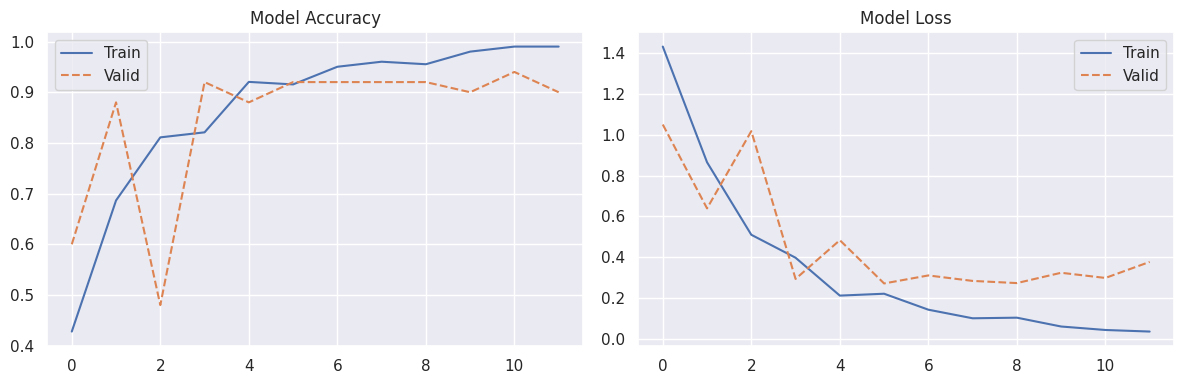

In [ ]:
#model.save("model.h5")

sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='Train')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='Valid', linestyle = 'dashed')
plt.title('Model Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(x=history.epoch, y=history.history['loss'], label='Train')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='Valid', linestyle = 'dashed')
plt.title('Model Loss')
plt.tight_layout()
#plt.savefig('epoch_history_dcnn.png')
plt.show()

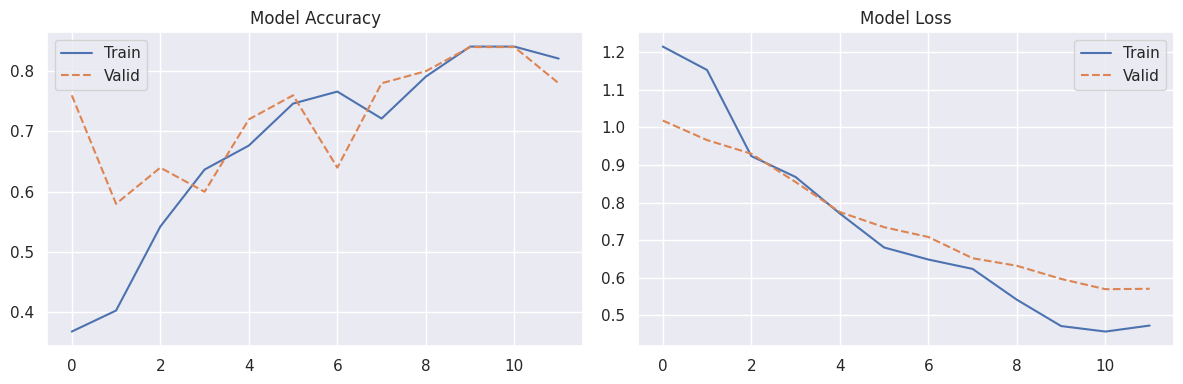

In [ ]:
# Model performance evaluation for VGG16
sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.lineplot(x=history_vgg16.epoch, y=history_vgg16.history['acc'], label='Train')
sns.lineplot(x=history_vgg16.epoch, y=history_vgg16.history['val_acc'], label='Valid', linestyle = 'dashed')
plt.title('Model Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(x=history_vgg16.epoch, y=history_vgg16.history['loss'], label='Train')
sns.lineplot(x=history_vgg16.epoch, y=history_vgg16.history['val_loss'], label='Valid', linestyle = 'dashed')
plt.title('Model Loss')
plt.tight_layout()
#plt.savefig('epoch_history_dcnn.png')
plt.show()

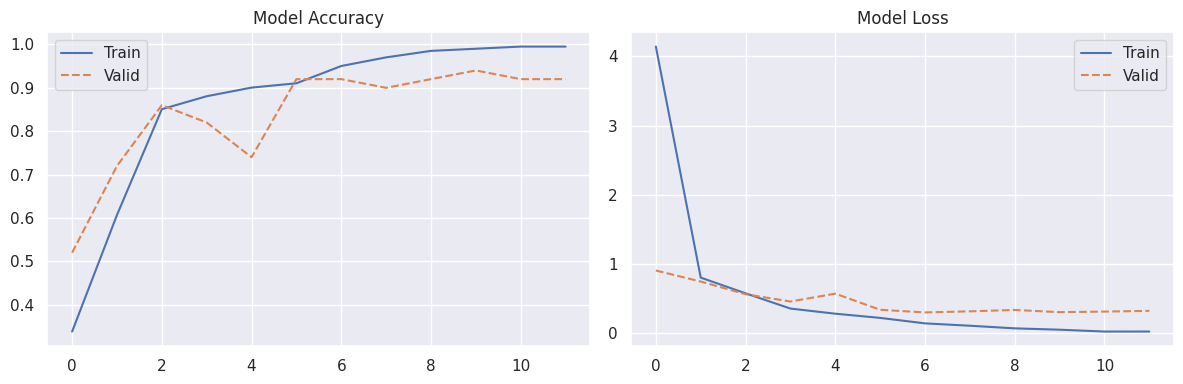

In [ ]:
sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.lineplot(x=history_resnet50.epoch, y=history_resnet50.history['accuracy'], label='Train')
sns.lineplot(x=history_resnet50.epoch, y=history_resnet50.history['val_accuracy'], label='Valid', linestyle = 'dashed')
plt.title('Model Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(x=history_resnet50.epoch, y=history_resnet50.history['loss'], label='Train')
sns.lineplot(x=history_resnet50.epoch, y=history_resnet50.history['val_loss'], label='Valid', linestyle = 'dashed')
plt.title('Model Loss')
plt.tight_layout()

plt.show()

## **Evaluating the Model Performance**
Let us see how well our model has learned from the train data, by testing it on the test data.

**Note:**

- model.evaluate(test_data) : Returns a list with the loss(at index 0) and accuracy(at index 1) of the predictions of the model on test_data.

- array[a:b] : Returns the elements of array from index a till b-1 inclusive.

- model.predict : Generates output predictions for the input samples. It - returns the probabilities of each class for a given test sample. We consider the classification to be of that class(or of that index) whose probability of the highest.

- np.argmax : Returns the indices of the maximum values along an axis.

## **1.Clasification Report**


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, ConfusionMatrixDisplay

In [ ]:
# Make predictions on the test data
y_pred1 = model1.predict(test_data)
y_pred1 = np.argmax(y_pred1, axis=1)  # Convert probabilities to class labels

# Get the true labels from the test data generator
y_true = test_data.classes

# Generate the classification report
class_names = list(test_data.class_indices.keys())
report_CNN = classification_report(y_true, y_pred1, target_names=class_names)

# Print the classification report
#print(report)

66/66 [==============================] - 32s 492ms/step


In [ ]:
# Make predictions on the test data
y_pred_vgg16 = model_vgg16.predict(test_data)
y_pred_vgg16 = np.argmax(y_pred_vgg16, axis=1)  # Convert probabilities to class labels

# Get the true labels from the test data generator
y_true = test_data.classes

# Generate the classification report
class_names = list(test_data.class_indices.keys())
report_vgg16 = classification_report(y_true, y_pred_vgg16, target_names=class_names)

# Print the classification report
#print(report)

66/66 [==============================] - 3s 26ms/step


In [ ]:
# Make predictions on the test data
y_pred_resnet50 = model_resnet50.predict(test_data)
y_pred_resnet50 = np.argmax(y_pred_resnet50, axis=1)  # Convert probabilities to class labels

# Get the true labels from the test data generator
y_true = test_data.classes

# Generate the classification report
class_names = list(test_data.class_indices.keys())
report_resnet50 = classification_report(y_true, y_pred_resnet50, target_names=class_names)

# Print the classification report
#print(report)

66/66 [==============================] - 2s 25ms/step


In [ ]:
train_result = model1.evaluate(train_data)
test_result = model1.evaluate(test_data)

no_augmented_df = pd.DataFrame((train_result,test_result),columns=['Train','Test'],index=['Loss','Acc'])
no_augmented_df

66/66 [==============================] - 2s 25ms/step - loss: 0.2259 - accuracy: 0.8788


,Train,Test
Loss,0.034293,0.980099
Acc,0.225918,0.878788


In [ ]:
train_result = model_vgg16.evaluate(train_data)
test_result = model_vgg16.evaluate(test_data)

no_augmented_df = pd.DataFrame((train_result,test_result),columns=['Train','Test'],index=['Loss','Acc'])
no_augmented_df

66/66 [==============================] - 2s 28ms/step - loss: 0.3726 - acc: 0.8788


,Train,Test
Loss,0.366142,0.885572
Acc,0.372621,0.878788


In [ ]:
train_result = model_resnet50.evaluate(train_data)
test_result = model_resnet50.evaluate(test_data)

no_augmented_df = pd.DataFrame((train_result,test_result),columns=['Train','Test'],index=['Loss','Acc'])
no_augmented_df

66/66 [==============================] - 2s 26ms/step - loss: 0.1130 - accuracy: 0.9545


,Train,Test
Loss,0.014826,1.000000
Acc,0.113022,0.954545


## **2.Confusion Matrix**

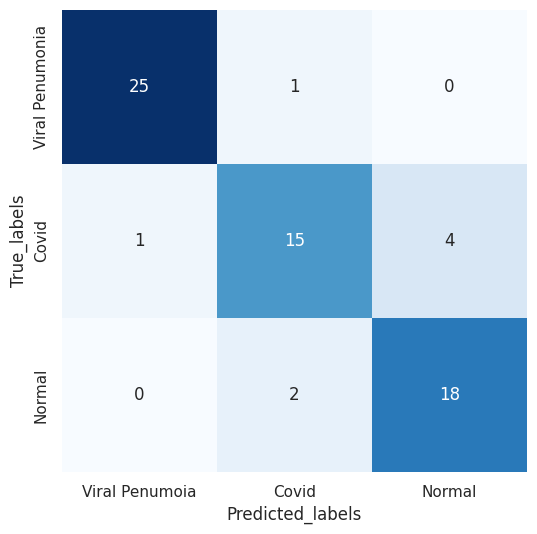

In [ ]:
plt.figure(figsize=(6, 6))
hm = sns.heatmap(confusion_matrix(y_true,y_pred1), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Viral Penumoia','Covid','Normal'],yticklabels=['Viral Penumonia','Covid','Normal'])
hm.set(xlabel='Predicted_labels')
hm.set(ylabel='True_labels')
plt.show()

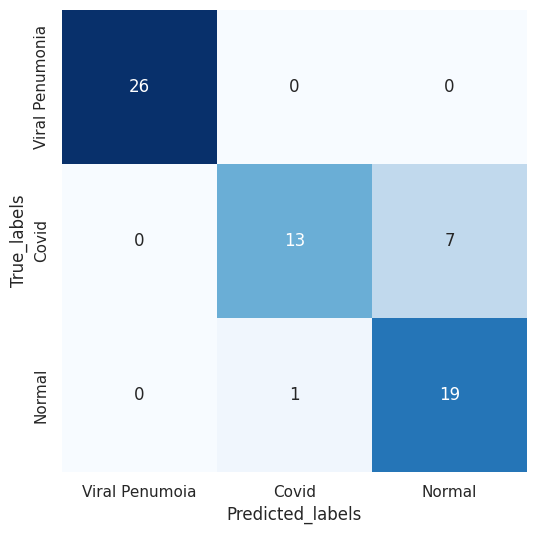

In [ ]:
plt.figure(figsize=(6, 6))
hm = sns.heatmap(confusion_matrix(y_true,y_pred_vgg16), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Viral Penumoia','Covid','Normal'],yticklabels=['Viral Penumonia','Covid','Normal'])
hm.set(xlabel='Predicted_labels')
hm.set(ylabel='True_labels')
plt.show()

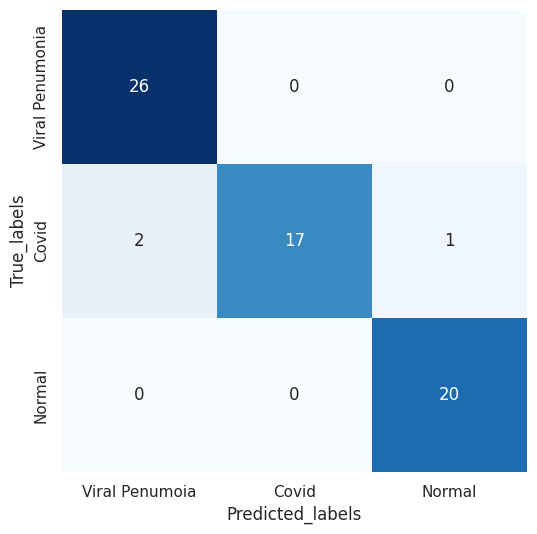

In [ ]:
plt.figure(figsize=(6, 6))
hm = sns.heatmap(confusion_matrix(y_true,y_pred_resnet50), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Viral Penumoia','Covid','Normal'],yticklabels=['Viral Penumonia','Covid','Normal'])
hm.set(xlabel='Predicted_labels')
hm.set(ylabel='True_labels')
plt.show()

In [ ]:
from tabulate import tabulate

# Create a list of model names
model_names = ['Custom_CNN', 'VGG16', 'Resnet50']

# Create a list of classification reports
reports = [report_CNN, report_vgg16, report_resnet50]

# Create a table
table = []
for model, report in zip(model_names, reports):
    table.append([model, report])

# Print the table
print(tabulate(table, headers=['Model', 'Classification Report'], tablefmt='grid'))

+------------+----------------------------------------------------------+
| Model      | Classification Report                                    |
+============+==========================================================+
| Custom_CNN | precision    recall  f1-score   support                  |
|            |                                                          |
|            |           Covid       0.96      0.96      0.96        26 |
|            | Viral Pneumonia       0.83      0.75      0.79        20 |
|            |          Normal       0.82      0.90      0.86        20 |
|            |                                                          |
|            |        accuracy                           0.88        66 |
|            |       macro avg       0.87      0.87      0.87        66 |
|            |    weighted avg       0.88      0.88      0.88        66 |
+------------+----------------------------------------------------------+
| VGG16      | precision    recall  f1